Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 327 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


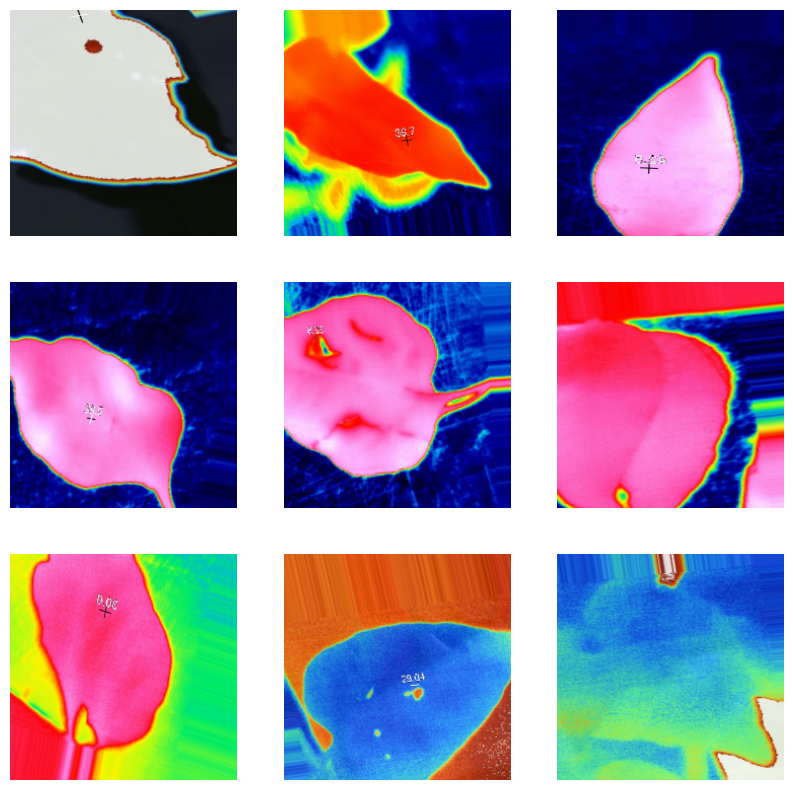

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt

# Mount Google Drive (specific for Google Colab)
from google.colab import drive
drive.mount('/content/drive')

# Define dataset path
data_dir = '/content/drive/MyDrive/dataset/train'

# Define image dimensions and batch size
img_height, img_width = 224, 224  # Resize to fit pre-trained models
batch_size = 32

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1.0/255,       # Normalize pixel values
    rotation_range=15,     # Augmentation: Random rotations
    width_shift_range=0.2, # Augmentation: Horizontal shifts
    height_shift_range=0.2,# Augmentation: Vertical shifts
    shear_range=0.2,       # Augmentation: Shear transformations
    zoom_range=0.2,        # Augmentation: Zoom transformations
    horizontal_flip=True,  # Augmentation: Horizontal flipping
    fill_mode='nearest',   # Fill strategy for augmentations
    validation_split=0.2   # Split dataset into training and validation
)

# Prepare train and validation datasets
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Visualize sample augmented images
sample_images, _ = next(train_data)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.axis('off')
plt.show()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 17,926,596 (68.38 MB)

 Trainable params: 3,211,908 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/60


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 231s 20s/step - accuracy: 0.2896 - loss: 2.9893 - val_accuracy: 0.2875 - val_loss: 2.3598
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 259s 20s/step - accuracy: 0.3167 - loss: 2.0829 - val_accuracy: 0.2125 - val_loss: 1.4458
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 264s 24s/step - accuracy: 0.2605 - loss: 1.4289 - val_accuracy: 0.2750 - val_loss: 1.3895
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 284s 20s/step - accuracy: 0.2920 - loss: 1.3509 - val_accuracy: 0.2875 - val_loss: 1.3780
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 264s 25s/step - accuracy: 0.4017 - loss: 1.3392 - val_accuracy: 0.3125 - val_loss: 1.3759
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 284s 20s/step - accuracy: 0.3641 - loss: 1.3285 - val_accuracy: 0.2875 - val_loss: 1.3673
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 227s 20s/step - accuracy: 0.3883 - loss: 1.2713 - val_accuracy: 0.3125 - val_loss: 1.3962
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 260s 20s/step - accuracy: 0.3297 - loss: 1.3111 - val_accuracy: 0.2125 - val_

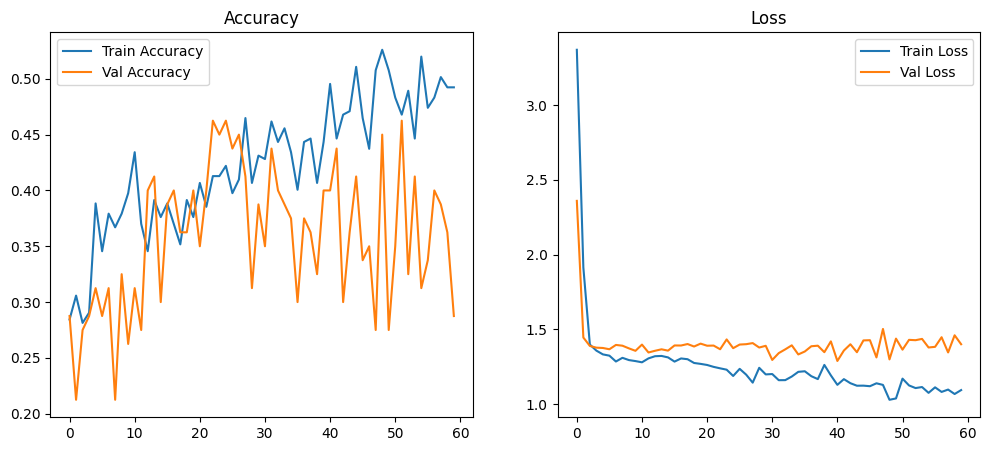

In [ ]:
# Import VGG16 and related modules
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(train_data.num_classes, activation='softmax')(x)

# Create final model
model_vgg = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model_vgg.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Print model summary
model_vgg.summary()

# Train the model
history_vgg = model_vgg.fit(
    train_data,
    validation_data=val_data,
    epochs=60,
    batch_size=batch_size
)

# Save the model
model_vgg.save('vgg16_thermal_model.h5')

# Plot accuracy and loss curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_vgg.history['accuracy'], label='Train Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history_vgg.history['loss'], label='Train Loss')
plt.plot(history_vgg.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()


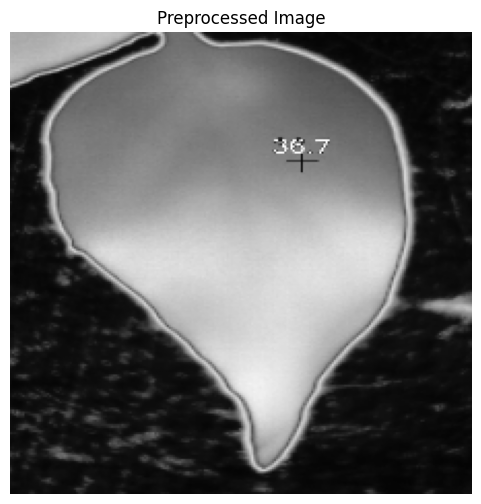

In [ ]:
# Enhanced preprocessing with channel expansion for grayscale
import cv2
import numpy as np

# Custom preprocessing function
def preprocess_image(image_path):
    # Load grayscale image
    grayscale_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    grayscale_img = cv2.resize(grayscale_img, (img_width, img_height))

    # Normalize pixel values
    grayscale_img = grayscale_img / 255.0

    # Apply colormap for visualization (optional)
    colored_img = cv2.applyColorMap((grayscale_img * 255).astype(np.uint8), cv2.COLORMAP_JET)

    # Expand to 3 channels
    final_img = np.stack([grayscale_img]*3, axis=-1)

    return final_img

# Function to visualize preprocessing
def visualize_preprocessing(image_path):
    preprocessed_img = preprocess_image(image_path)
    plt.figure(figsize=(6, 6))
    plt.imshow(preprocessed_img)
    plt.title("Preprocessed Image")
    plt.axis('off')
    plt.show()

# Test with a sample image from the dataset
sample_image_path = '/content/drive/MyDrive/dataset/train/healthy/IR_01807.jpg'
visualize_preprocessing(sample_image_path)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Conv2D, Multiply, GlobalAveragePooling2D, Reshape


class SpatialAttention(Layer):
    def __init__(self, kernel_size=7, **kwargs):
        super(SpatialAttention, self).__init__(**kwargs)
        self.kernel_size = kernel_size
        self.conv = Conv2D(1, kernel_size=self.kernel_size, strides=1, padding="same", activation="sigmoid")

    def call(self, inputs):
        # Compute channel-wise mean and max
        mean = tf.reduce_mean(inputs, axis=-1, keepdims=True)
        max_val = tf.reduce_max(inputs, axis=-1, keepdims=True)
        concat = tf.concat([mean, max_val], axis=-1)
        # Generate attention map
        attention = self.conv(concat)
        # Apply attention map
        output = Multiply()([inputs, attention])
        return output


# Add the custom spatial attention layer to the VGG16 model
base_model = tf.keras.applications.VGG16(include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = SpatialAttention()(x)  # Use the custom layer here
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
output = tf.keras.layers.Dense(10, activation='softmax')(x)

# Create the final model
model = tf.keras.models.Model(inputs=base_model.input, outputs=output)


In [ ]:
# Add the spatial attention layer
x = base_model.output
attention = SpatialAttention()(x)  # Apply attention
x = Flatten()(attention)  # Flatten after applying attention
x = Dense(128, activation='relu')(x)  # Example intermediate layer
output_layer = Dense(4, activation='softmax')(x)  # Adjust the output to 4 classes
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
history_vgg_attention = model.fit(
    train_data,
    validation_data=val_data,
    epochs=25,
    batch_size=batch_size
)

# Save the refined model
model.save('vgg16_attention_thermal_model.h5')

# Evaluation as before
val_data.reset()  # Ensure generator starts from the beginning
y_pred = model.predict(val_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_data.classes

# Update class labels with your actual labels
class_labels = ["Class1", "Class2", "Class3", "Class4"]  # Ensure correct class names

print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 8))
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(ticks=range(len(class_labels)), labels=class_labels, rotation=45)
plt.yticks(ticks=range(len(class_labels)), labels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
# Visualize attention map
def visualize_attention(image_path, model):
    preprocessed_img = preprocess_image(image_path)
    preprocessed_img = np.expand_dims(preprocessed_img, axis=0)
    attention_model = Model(inputs=model.input, outputs=model.layers[-3].output)  # Modify as per architecture
    attention_map = attention_model.predict(preprocessed_img)
    plt.imshow(attention_map[0, :, :, 0], cmap='jet')
    plt.title('Attention Map')
    plt.show()

# Test with a sample image
visualize_attention(sample_image_path, model_vgg_attention)
